In [73]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

**Collection of Data**

In [74]:
url_dataset = pd.read_csv("url_dataset.csv")

In [75]:
url_dataset.head(10)

,protocol,domain_name,address,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,abnormal_url,web_traffic,domain_registration_length,age_of_domain,dns_record,statistical_report
0,http,www.liquidgeneration.com,NaN,0,0,0,0,0,0,0,1,1,2,1,1,1,0
1,http,www.onlineanime.org,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,http,www.ceres.dti.ne.jp,~nekoi/senno/senfirst.html,0,0,0,0,1,0,0,1,1,0,1,1,1,0
3,http,www.galeon.com,kmh/,0,0,0,0,0,0,0,1,1,0,1,1,1,0
4,http,www.fanworkrecs.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,0
5,http,www.animehouse.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,1
6,http,www2.117.ne.jp,~mb1996ax/enadc.html,0,0,0,0,2,0,0,1,1,2,1,1,1,0
7,http,archive.rhps.org,fritters/yui/index.html,0,0,0,0,0,0,0,1,1,2,1,1,1,0
8,http,www.freecartoonsex.com,NaN,0,0,0,0,0,0,1,1,1,2,1,1,1,0
9,http,www.cutepet.org,NaN,0,0,0,0,0,0,0,1,1,2,1,1,1,0


In [76]:
url_dataset.columns

Index(['protocol', 'domain_name', 'address', 'long_url', 'having_@_symbol',
       'redirection_//_symbol', 'prefix_suffix_seperation', 'sub_domains',
       'having_ip_address', 'shortening_service', 'https_token',
       'abnormal_url', 'web_traffic', 'domain_registration_length',
       'age_of_domain', 'dns_record', 'statistical_report'],
      dtype='object')

In [77]:
urls = url_dataset.drop(url_dataset.columns[[0,1,2]],axis=1)

In [78]:
urls.head()

,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,abnormal_url,web_traffic,domain_registration_length,age_of_domain,dns_record,statistical_report
0,0,0,0,0,0,0,0,1,1,2,1,1,1,0
1,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,0,0,0,0,1,0,0,1,1,0,1,1,1,0
3,0,0,0,0,0,0,0,1,1,0,1,1,1,0
4,0,0,0,0,0,0,0,1,1,1,1,1,1,0


In [79]:
urls = urls.sample(frac=1).reset_index(drop=True)

In [80]:
urls_without_labels = urls.drop('statistical_report',axis=1)
urls_without_labels.columns
prediction_labels = 0.16
labels = urls['statistical_report']


In [81]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)

In [82]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1309 562 1309 562


In [83]:
labels_train.value_counts()

0    948
1    361
Name: statistical_report, dtype: int64

In [84]:
labels_test.value_counts()

0    393
1    169
Name: statistical_report, dtype: int64

In [85]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

In [86]:
random_forest_classifier.fit(data_train,labels_train)


RandomForestClassifier()

In [87]:
prediction_label = random_forest_classifier.predict(data_test)
prediction_label

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score
cpnfusionMatrix = confusion_matrix(labels_test,prediction_label)
print(cpnfusionMatrix)
prediction_labels+accuracy_score(labels_test,prediction_label)

[[375  18]
 [114  55]]


0.9251245551601424

In [89]:
custom_random_forest_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, max_leaf_nodes=10000)

In [90]:
custom_random_forest_classifier.fit(data_train,labels_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=10000, n_estimators=500)

In [91]:
custom_classifier_prediction_label = custom_random_forest_classifier.predict(data_test)

In [92]:
confusionMatrix2 = confusion_matrix(labels_test,custom_classifier_prediction_label)
print(confusionMatrix2)
prediction_labels+accuracy_score(labels_test,custom_classifier_prediction_label)

[[371  22]
 [112  57]]


0.9215658362989324

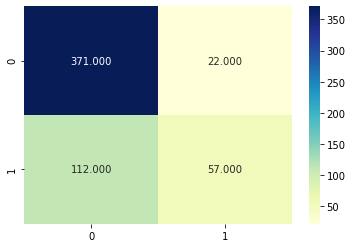

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = [0,1]
sns.heatmap(confusionMatrix2, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()